Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
data = pd.read_csv('bank.csv')
data.shape
d1 = data
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
d1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
d1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
number_col = d1.select_dtypes(include = np.number)

In [6]:
number_col

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [7]:
corr_n = number_col.corr()
corr_n

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


<AxesSubplot:>

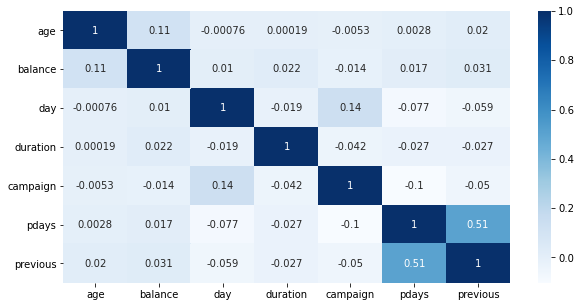

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_n, annot = True, cmap = 'Blues')


checking Outliers

<AxesSubplot:ylabel='balance'>

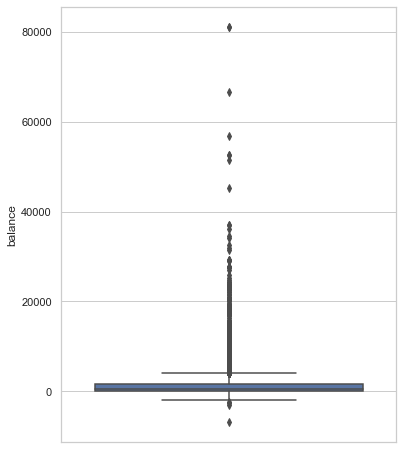

In [9]:
plt.figure(figsize=(6,8))
sns.set_theme(style="whitegrid")
sns.boxplot(y = d1.balance, )

In [10]:
np.quantile(d1['balance'],.995, axis =0)

20035.764999999963

In [11]:
d1['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [12]:
d1.drop(d1[d1['balance']>20036].index,axis=0,inplace=True)

In [13]:
d1['poutcome'].describe()

count       11106
unique          4
top       unknown
freq         8286
Name: poutcome, dtype: object

In [14]:
d1['poutcome'].value_counts() # Deleting this column as most of the fields data is unknown


unknown    8286
failure    1225
success    1064
other       531
Name: poutcome, dtype: int64

In [15]:
d1['contact'].value_counts() # Deleting this column 

cellular     8001
unknown      2339
telephone     766
Name: contact, dtype: int64

In [16]:
le = preprocessing.LabelEncoder()
d1['job'] = le.fit_transform(d1['job'])
d1['marital'] = le.fit_transform(d1['marital'])
d1['education'] = le.fit_transform(d1['education'])
d1['housing'] = le.fit_transform(d1['housing'])
d1['loan'] = le.fit_transform(d1['loan'])
d1['month'] = le.fit_transform(d1['month'])
d1['month'] = le.fit_transform(d1['month'])
d1['deposit'] = le.fit_transform(d1['deposit'])
d1['default'] = le.fit_transform(d1['default'])

In [17]:
d1= d1.drop(['poutcome'], axis=1)
d1 = d1.drop(['contact'], axis=1)

In [18]:
d1


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,20,0,257,1,-1,0,0
11158,39,7,1,1,0,733,0,0,16,6,83,4,-1,0,0
11159,32,9,2,1,0,29,0,0,19,1,156,2,-1,0,0
11160,43,9,1,1,0,0,0,1,8,8,9,2,172,5,0


In [19]:
x = d1.drop(['deposit'], axis = 1).values
y = d1['deposit'].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=101 )

In [21]:
dt_model1 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model1.fit(x_train, y_train)

dt_model1_train = dt_model1.score(x_train,y_train)
dt_model1_test = dt_model1.score(x_test,y_test)
print("dt_model1-Training Score -", dt_model1_train )
print("dt_model1-Test Score -", dt_model1_test )

dt_model1-Training Score - 0.7104450733213274
dt_model1-Test Score - 0.712484993997599


In [22]:
dt_model1a = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model1a.fit(x_train, y_train)
y_train_predict = dt_model1a.predict(x_train)
y_test_predict =  dt_model1a.predict(x_test)
dt_model1a_train = metrics.accuracy_score(y_train, y_train_predict)
dt_model1a_test = metrics.accuracy_score(y_test,y_test_predict)
print("dt_model1a-Training Score -", dt_model1a_train )
print("dt_model1a-Test Score -", dt_model1a_test )

dt_model1a-Training Score - 0.7104450733213274
dt_model1a-Test Score - 0.712484993997599


In [23]:
dt_model2 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model2.fit(x_train, y_train)

dt_model2_train = dt_model2.score(x_train,y_train)
dt_model2_test = dt_model2.score(x_test,y_test)
print("dt_model2-Training Score -", dt_model2_train )
print("dt_model2-Test Score -", dt_model2_test )

dt_model2-Training Score - 0.7896835605865706
dt_model2-Test Score - 0.7824129651860744


In [24]:
dt_model3 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model3.fit(x_train, y_train)

dt_model3_train = dt_model3.score(x_train,y_train)
dt_model3_test = dt_model3.score(x_test,y_test)
print("dt_model3-Training Score -", dt_model3_train )
print("dt_model3-Test Score -", dt_model3_test )

dt_model3-Training Score - 0.8156676099819913
dt_model3-Test Score - 0.7968187274909964


# decision model 4 gives better score performance

In [25]:
dt_model4 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model4.fit(x_train, y_train)

dt_model4_train = dt_model4.score(x_train,y_train)
dt_model4_test = dt_model4.score(x_test,y_test)
print("dt_model4-Training Score -", dt_model4_train )
print("dt_model4-Test Score -", dt_model4_test )

dt_model4-Training Score - 0.8388217134036532
dt_model4-Test Score - 0.8001200480192077


In [26]:
dt_model5 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model5.fit(x_train, y_train)

dt_model5_train = dt_model5.score(x_train,y_train)
dt_model5_test = dt_model5.score(x_test,y_test)
print("dt_model5-Training Score -", dt_model5_train )
print("dt_model5-Test Score -", dt_model5_test )

dt_model5-Training Score - 0.8537432467198354
dt_model5-Test Score - 0.7971188475390156


In [27]:
dt_model6 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model6.fit(x_train, y_train)

dt_model6_train = dt_model6.score(x_train,y_train)
dt_model6_test = dt_model6.score(x_test,y_test)
print("dt_model6-Training Score -", dt_model6_train )
print("dt_model6-Test Score -", dt_model6_test )

dt_model6-Training Score - 0.8637766915358889
dt_model6-Test Score - 0.7977190876350541


In [28]:
dt_model7 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=14,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model7.fit(x_train, y_train)

dt_model7_train = dt_model7.score(x_train,y_train)
dt_model7_test = dt_model7.score(x_test,y_test)
print("dt_model7-Training Score -", dt_model7_train )
print("dt_model7-Test Score -", dt_model7_test )

dt_model7-Training Score - 0.8700797530228969
dt_model7-Test Score - 0.7932172869147659


checking with entropy

In [29]:
dt_model8 = DecisionTreeClassifier(criterion='entropy',
    splitter='best',
    max_depth=14,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0
)
dt_model8.fit(x_train, y_train)

dt_model8_train = dt_model8.score(x_train,y_train)
dt_model8_test = dt_model8.score(x_test,y_test)
print("dt_model8-Training Score -", dt_model8_train )
print("dt_model8-Test Score -", dt_model8_test )

dt_model8-Training Score - 0.8761255466941086
dt_model8-Test Score - 0.7953181272509003


# Graphical Representation of tree

[Text(697.4594476744186, 1540.2, 'X[10] <= 205.5\ngini = 0.499\nsamples = 7774\nvalue = [4098, 3676]'),
 Text(289.5436046511628, 1359.0, 'X[12] <= 9.5\ngini = 0.324\nsamples = 3111\nvalue = [2479, 632]'),
 Text(165.45348837209303, 1177.8, 'X[9] <= 9.5\ngini = 0.242\nsamples = 2423\nvalue = [2081, 342]'),
 Text(97.32558139534883, 996.6, 'X[9] <= 0.5\ngini = 0.216\nsamples = 2343\nvalue = [2055, 288]'),
 Text(46.71627906976744, 815.4, 'X[6] <= 0.5\ngini = 0.5\nsamples = 122\nvalue = [61, 61]'),
 Text(31.144186046511628, 634.2, 'X[8] <= 26.5\ngini = 0.393\nsamples = 78\nvalue = [21, 57]'),
 Text(23.35813953488372, 453.0, 'X[0] <= 62.0\ngini = 0.316\nsamples = 66\nvalue = [13, 53]'),
 Text(15.572093023255814, 271.79999999999995, 'X[10] <= 109.0\ngini = 0.245\nsamples = 56\nvalue = [8, 48]'),
 Text(7.786046511627907, 90.60000000000014, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(23.35813953488372, 90.60000000000014, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(31.144186046

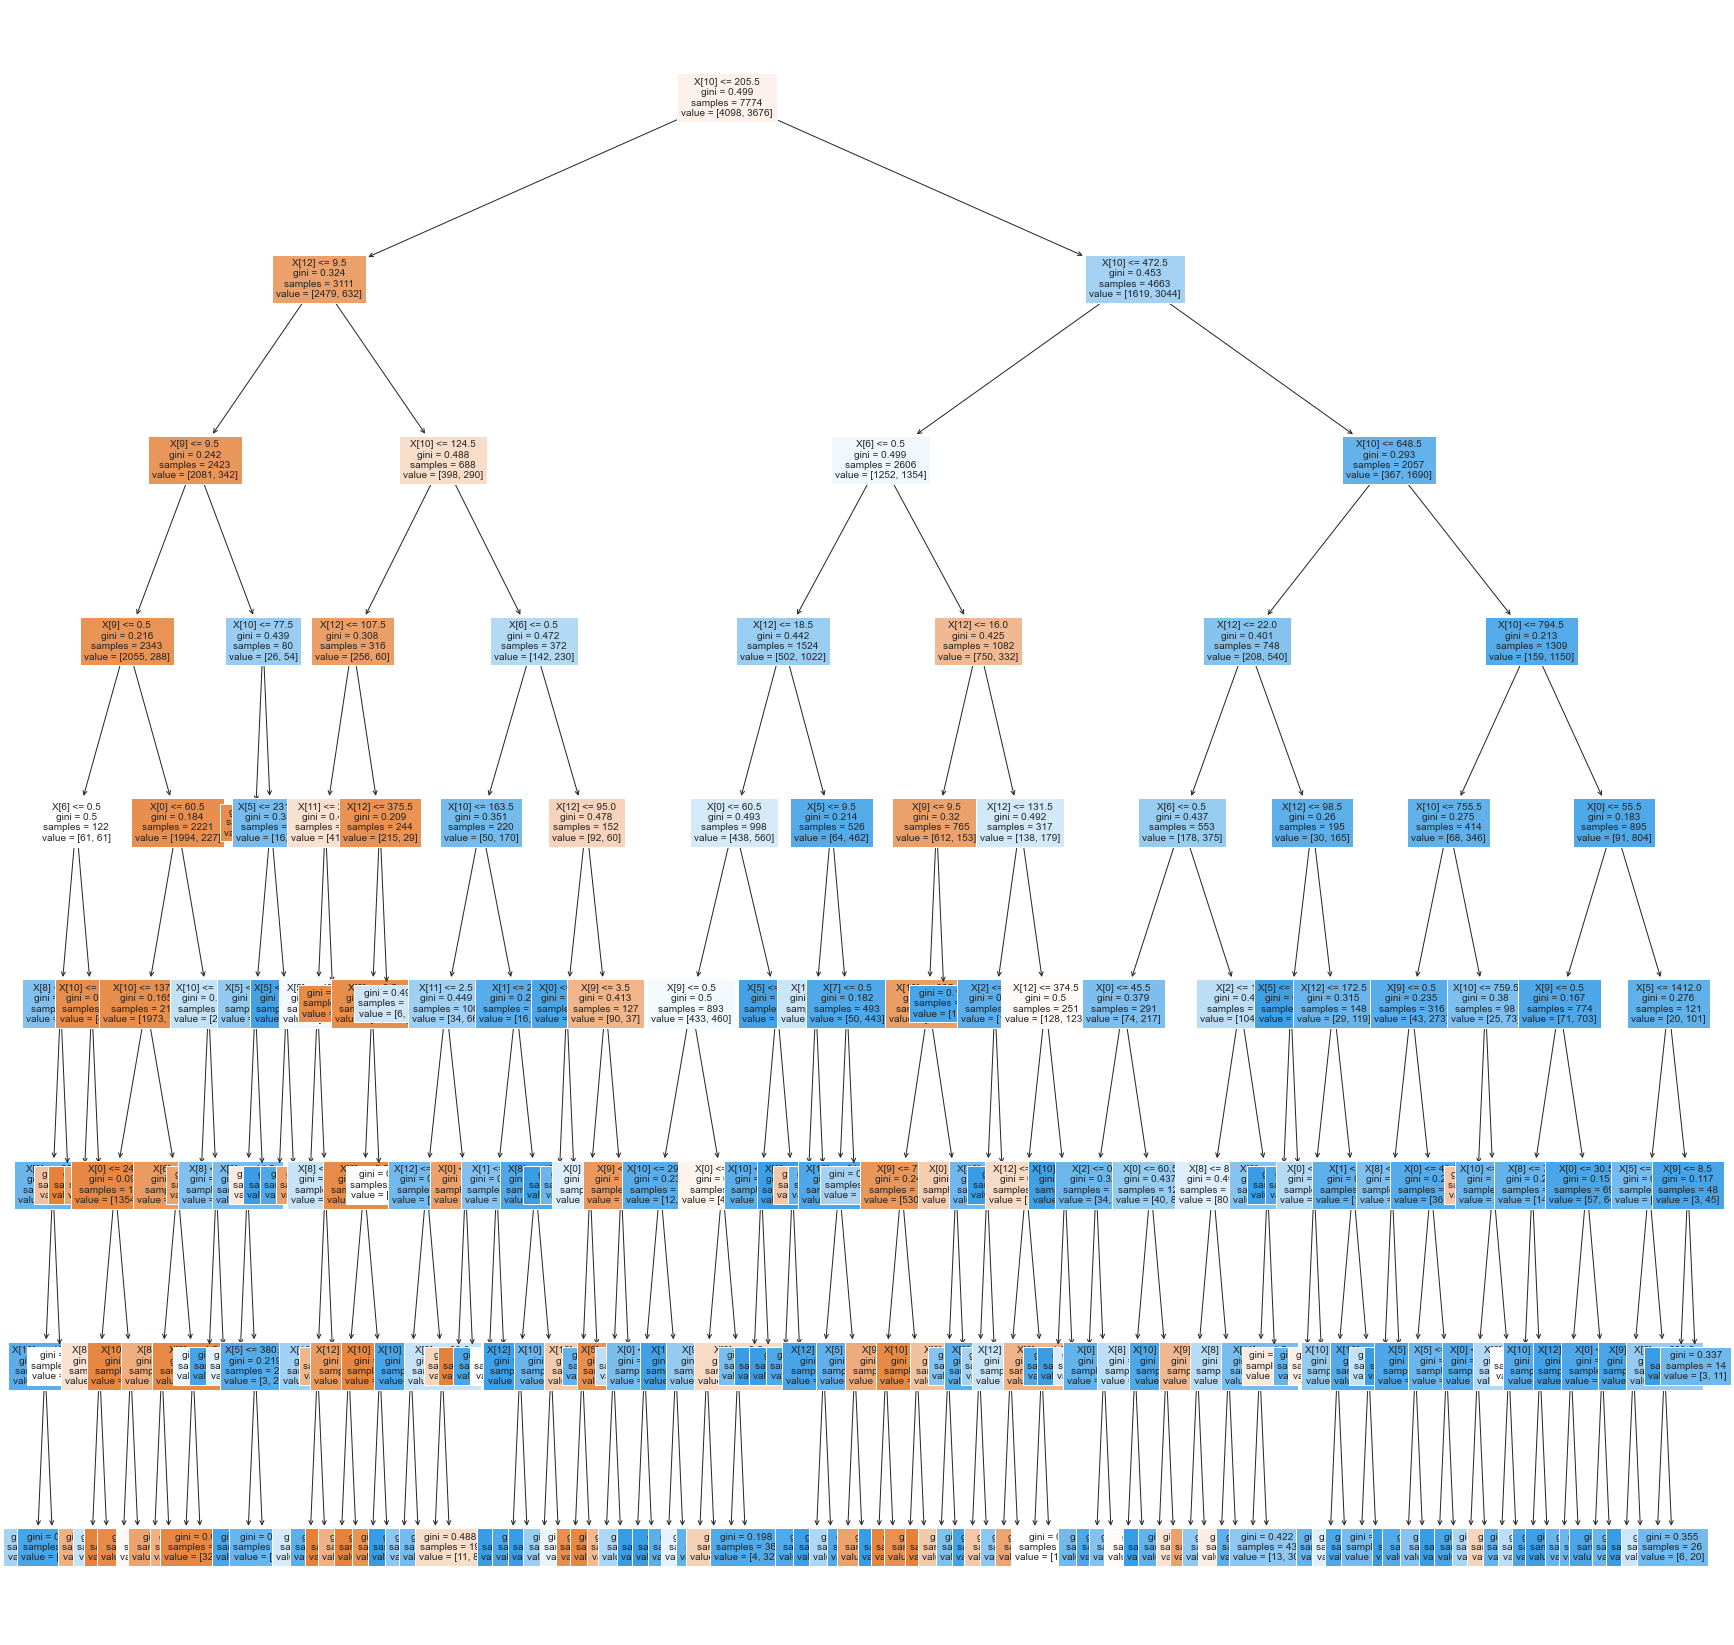

In [69]:
from sklearn import tree
plot_rows =1
plot_cols = 1
fig, ax1 = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (30,30))
#tree.plot_tree(dt_model1)

tree.plot_tree(dt_model4, filled=True, ax=ax1,fontsize=10)
#fig.savefig('imagename.png')

In [31]:
from io import StringIO
from sklearn.tree import export_graphviz


from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

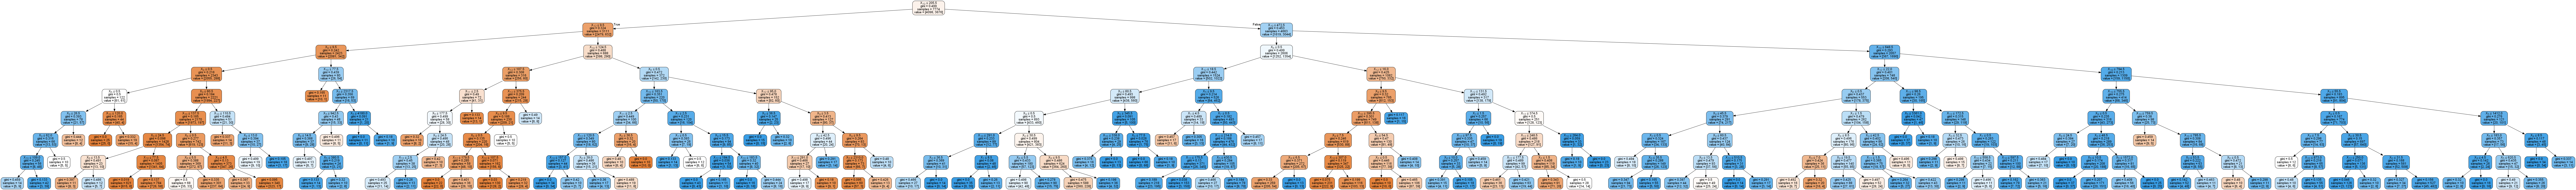

<Figure size 720x576 with 0 Axes>

In [32]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_model4,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [33]:
# performance Matrices

In [34]:
y_test_pred = dt_model4.predict(x_test)


In [35]:
y_train_pred = dt_model4.predict(x_train)
y_train_pred.shape

(7774,)

In [36]:
y_train.shape


(7774,)

In [37]:
y_test.reshape(-1,1)
y_test.shape

(3332,)

In [38]:
dt_model4_train_score = metrics.accuracy_score(y_train,y_train_pred)
print("Train score: ",dt_model4_train_score)
dt_model4_test_score = metrics.accuracy_score(y_test,y_test_pred)
print("Test score: ",dt_model4_test_score)

Train score:  0.8388217134036532
Test score:  0.8001200480192077


In [39]:
conf_matrix_test = confusion_matrix(y_test,y_test_pred)
conf_matrix_test

array([[1479,  269],
       [ 397, 1187]], dtype=int64)

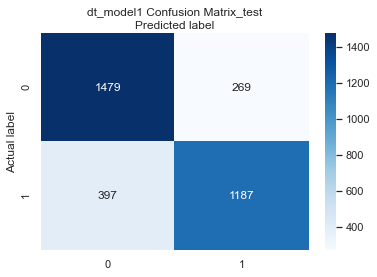

In [40]:
ax = sns.heatmap(conf_matrix_test,cmap='Blues', annot = True,fmt='.4g')
ax.set_title('dt_model1 Confusion Matrix_test');
ax.xaxis.set_label_position("top")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Note 3 digit numbers will appear as scietific numbers in the heatmap. to rectify that fmt='.2g'  has to be chnaged to "d"- digital or .3g so that it shows 3 digits 

In [41]:
Recall_train = metrics.recall_score(y_train,y_train_pred)
Recall_test = metrics.recall_score(y_test,y_test_pred)
print( "Recall_Train:" ,Recall_train) 
print("Recall_Test:", Recall_test)

Recall_Train: 0.7967899891186072
Recall_Test: 0.7493686868686869


In [42]:
Precision_train = metrics.precision_score(y_train,y_train_pred)
Precision_test = metrics.precision_score(y_test,y_test_pred)
print( "Precision_train:" ,Precision_train) 
print("Precision_test:", Precision_test)

Precision_train: 0.8526928675400292
Precision_test: 0.8152472527472527


In [43]:
y_test

array([0, 0, 0, ..., 1, 1, 0])

In [44]:
conf_matrix_train = confusion_matrix(y_train,y_train_pred)
conf_matrix_train

array([[3592,  506],
       [ 747, 2929]], dtype=int64)

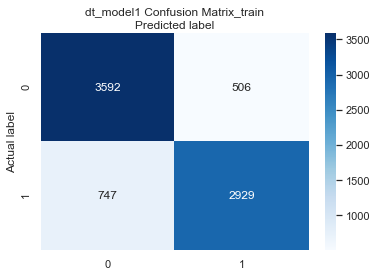

In [45]:
ax = sns.heatmap(conf_matrix_train,cmap='Blues', annot = True,fmt='.4g')
ax.set_title('dt_model1 Confusion Matrix_train');
ax.xaxis.set_label_position("top")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

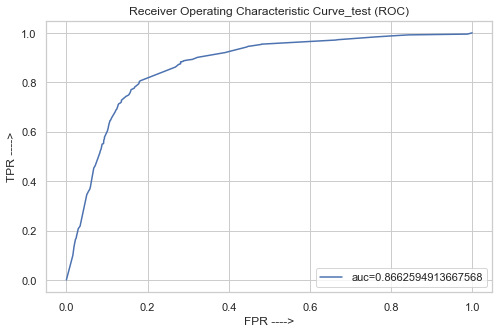

In [46]:
y_pred_proba = dt_model4.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve_test (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

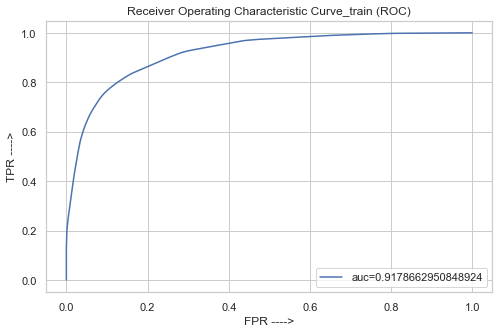

In [47]:
y_pred_proba_train = dt_model4.predict_proba(x_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba_train)
auc = metrics.roc_auc_score(y_train, y_pred_proba_train)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve_train (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()